## Introduction to Data Analysis Project
### The objective of this project is to investigate the Titanic dataset which contains the information for 891  people of the 2224 passangers on board of the Titanic that sank in North Atlantic Ocean in the early morning of 15 April, 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City [Wikipidia](https://en.wikipedia.org/wiki/RMS_Titanic). The objective of this investigation is to answer the following quastions based on the information provided in the dataset.

1. Who are the demography of the passangers onbaord (i.e, interms of sex, age, class etc.?
2. Which deck were the passagers on and how does that relate to their class?
3. Where did the passanges come from? (e.g, city, country etc)
4. Was the passanger alone, with friends or family?
5. What factors helped someone to survive

### First let us get started by loading the required modules for the data analysis

In [2]:
import unicodecsv
import matplotlib.pylab as plt
import pandas as pd
from pandas import Series, DataFrame
import  numpy as np
import seaborn as sns


In [3]:
#Having the neccessary modules for the analysis lets now load the Titanic dataset
# and using pands module

titanic_df = pd.read_csv('titanic-data.csv')

In [7]:
# Lets have a general insight about the dataset by loading a portion of the dataset (head(), command ) 

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### The Titanic data set contains information about passanger ID, if passanger was survived or not (i.e. 1 is survived and o is dead) , name of passanger, sex, if passanger had childeren (i.e., 1 = had sibling and o = no sibling) , age, Parch (if they have parents at board, 1 = with parent and 0= with out parent), ticket, fare, cabin (contains deck information) and where they have boarded the Taitanic (Embark)

In [11]:
## Now let us have a general qulitative infromation of the Titanic data set for each column using the 'info()' command
## on the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### We cab also see derscription of the data set , that is the descriptitve statistics such as count , mean , std , min and percentile (e.g. of Age ) 

In [38]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### From the above result we can have a general knowlege of how many records we have for each item or column, forexample we have only 204 records on 'Cabin' , we only know the age of 714 people from 891 passanger and etc.

### Having this in mind let us try to look for answere for the first question listed above, that is who were the passenger on board, their sex, age ,class and so on

In [67]:
#Let us first see the class of the passangers, I use the 'groupby()' function

tit_group_byclass = titanic_df.groupby('Pclass').mean()

tit_group_byclass

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### The above result dipicts that the mean fair of the first clas is 84.15 which is more than six time the third class and about 4 times the second class. The average age of passangers in the first class was 38.23 which shows passanger in the first class are older by a about 10 years than the second class passanger and more than 13 years older than the third class passangers,which makes sense that older people are most probalily richer than younger ones.

In [76]:
#Let us break down the data by both class and gender using the same 'groupby' function we used above 
tit_grpby_sexclass = titanic_df.groupby(['Pclass','Sex']).mean()

tit_grpby_sexclass


PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

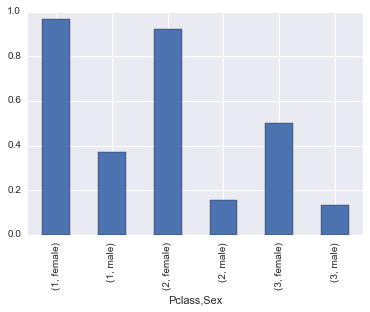

In [78]:
%matplotlib inline
tit_grpby_sexclass['Survived'].plot.bar()


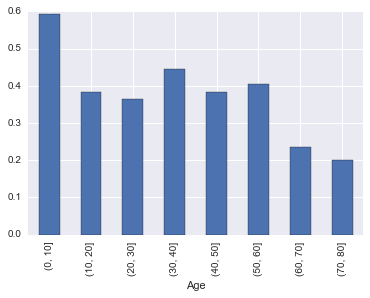

In [80]:
group_by_age = pd.cut(titanic_df["Age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()